<a href="https://colab.research.google.com/github/karunaprakash062/multilabel/blob/main/MultiClassHTBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.3 MB/s eta 0:00:00


In [3]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification,TFBertForSequenceClassification
from transformers import AutoTokenizer
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast
PRETRAINED_LM = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(PRETRAINED_LM)

In [4]:
data = pd.read_json('/content/drive/MyDrive/News_Category_Dataset_v3.json', lines=True)

In [5]:
train, val = train_test_split(data, test_size=0.3,random_state=10000)

In [6]:
train = train.sample(9000,replace=True)

In [7]:
train.shape

(9000, 6)

In [8]:
val = val.sample(1000,replace=True)

In [9]:
val.shape

(1000, 6)

In [10]:
val.head()

,link,headline,category,short_description,authors,date
36163,https://www.huffingtonpost.com/entry/jim-parso...,Jim Parsons Lies Through His Teeth To Find Pup...,COMEDY,🐶🐶🐶,Lee Moran,2017-05-04
150510,https://www.huffingtonpost.com/entry/why-gramm...,Why Grammar Is Important,PARENTING,Not long ago I was at my dentist's office gett...,"William B. Bradshaw, Contributor\nAuthor",2013-10-19
76117,https://www.huffingtonpost.com/entry/powell-ri...,"Rice Aides, Powell Received Classified Informa...",POLITICS,The findings come after nearly a year of contr...,"Mark Hosenball, Reuters",2016-02-05
194583,https://www.huffingtonpost.com/entry/6-great-t...,6 Great Tips for Planning Your Honeymoon,QUEER VOICES,You made it through your wedding! No doubt it ...,"Jincey Lumpkin, Contributor\nFounder, Jincey &...",2012-07-07
60987,https://www.huffingtonpost.com/entry/moms-awes...,Mom's Awesome Invention Provides Comfort For N...,PARENTS,"It was inspired by her son, who was born prema...",Taylor Pittman,2016-07-27


In [11]:
text_data=np.array(train['short_description'])
valid_data=np.array(val['short_description'])

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [14]:
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()

In [15]:
cleaned_data=[]
val_cleaned_data=[]

In [16]:
for text in text_data:
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(sentence)
    #statement6-removing stop_words
  i=0
  while i<3:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  cleaned_data.append(cleaned_text)

In [17]:
train['cleaned_text']=cleaned_data

In [18]:
train['cleaned_text'].head()

136698    flight back u memorable pilot announces seven ...
137465    improving food label planned usfda much news p...
186717    jack white currently new york city promoting n...
66340     shooting started wednesday night argument brok...
192482    living uncertainty come believe know thing bod...
Name: cleaned_text, dtype: object

In [19]:
for text in valid_data:
  text=text.lower()
    #statement1-removing special characters and Punctuation
  sentence=re.sub(r'[^\w\s]','',text)
    #statement2-removing numbers from text
  sentence=re.sub(r'[0-9]+','',sentence)
    #statement3-removing html tags and urls from text
  sentence = re.sub(r'<.*?>', '', sentence)
    #statement4-removing urls from text
  clean_text = re.sub(r'http\S+', '',sentence)
    #statement5-text to word tokenization
  sentence=nltk.word_tokenize(sentence)
    #statement6-removing stop_words
  i=0
  while i<3:
    sentence = [word for word in sentence if word.lower() not in stop_words]
    i=i+1
  lst=[]
   #statement7-lemmatization
  for word in sentence:
    lst.append(lemmatizer.lemmatize(word))
  #statement8-joing words to form sentence
  cleaned_text=' '.join(lst)
  val_cleaned_data.append(cleaned_text)

In [20]:
val['cleaned_text']=val_cleaned_data

In [21]:
val['cleaned_text'].head()

36163                                                      
150510    long ago dentist office getting teeth cleaned ...
76117     finding come nearly year controversy hillary c...
194583    made wedding doubt lot handle youre ready get ...
60987                         inspired son born prematurely
Name: cleaned_text, dtype: object

In [22]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

In [23]:
train_input_ids, train_att_masks = encode(train['cleaned_text'].values.tolist())
valid_input_ids, valid_att_masks = encode(val['cleaned_text'].values.tolist())

In [24]:
train.category = pd.Categorical(train.category)
val.category = pd.Categorical(val.category)

In [25]:
train['label'] = train.category.cat.codes
val['label'] = val.category.cat.codes

In [26]:
import torch
train_y = torch.LongTensor(train['label'].values.tolist())
valid_y = torch.LongTensor(val['label'].values.tolist())
train_y.size(),valid_y.size()

(torch.Size([9000]), torch.Size([1000]))

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 64
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

In [28]:
from transformers import BertForSequenceClassification
N_labels = len(train.label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [30]:
model = model.cuda()

In [31]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 100
LEARNING_RATE = 0.001

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE,weight_decay=15)
scheduler = get_linear_schedule_with_warmup(optimizer, 
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

In [33]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.best_score:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)


In [ ]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

early_stopping = EarlyStopping(patience=3, verbose=True)

train_loss_per_epoch = []
val_loss_per_epoch = []

for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)
        
        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))              

    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()
   
            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
        
    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(val) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

    early_stopping(valid_loss / (step_num_e + 1), model)
    if early_stopping.early_stop:
        print("Early stopping, epoch:", epoch_num + 1)
        break
    


Epoch:  1


Training:   0%|          | 0/141 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

141/141 train loss: 3.300760751074933 
16/16 val loss: 3.308854967355728 
Validation loss decreased (-3.308855 --> 3.308855).  Saving model ...
Epoch:  2


Training:   0%|          | 0/141 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

141/141 train loss: 3.293881852576073 
16/16 val loss: 3.31341789662838 
EarlyStopping counter: 1 out of 3
Epoch:  3


Training:   0%|          | 0/141 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

141/141 train loss: 3.2981134509363916 
16/16 val loss: 3.3095017969608307 
EarlyStopping counter: 2 out of 3
Epoch:  4


Training:   0%|          | 0/141 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

141/141 train loss: 3.2986467527159564 
16/16 val loss: 3.2976493537425995 
Validation loss decreased (-3.297649 --> 3.297649).  Saving model ...
Epoch:  5


Training:   0%|          | 0/141 [00:00<?, ?it/s]

Validation:   0%|          | 0/16 [00:00<?, ?it/s]

141/141 train loss: 3.3023061583228146 
16/16 val loss: 3.2998629957437515 
EarlyStopping counter: 1 out of 3
Epoch:  6


Training:   0%|          | 0/141 [00:00<?, ?it/s]

ValueError: ignored

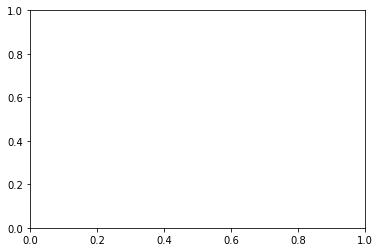

In [37]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, val['label'].to_numpy(), target_names=label_fnames))